In [1]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 3D -> 1D
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

## Preprocessing
1. Read the pictures files
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Resize them to a shared size (we'll use 180 x 180)
5. Pack them into batches (we'll use batches of 32 images)

In [15]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

new_base_dir = pathlib.Path("cats-vs-dogs-small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print(f"data batch shape: {data_batch.shape}")
    print(f"labels batch shape: {labels_batch.shape}")
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 443ms/step - accuracy: 0.5197 - loss: 0.8988 - val_accuracy: 0.5000 - val_loss: 0.8085
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 414ms/step - accuracy: 0.5114 - loss: 0.7508 - val_accuracy: 0.5000 - val_loss: 0.7318
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 413ms/step - accuracy: 0.5652 - loss: 0.6991 - val_accuracy: 0.5470 - val_loss: 0.6836
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 426ms/step - accuracy: 0.5910 - loss: 0.6919 - val_accuracy: 0.6220 - val_loss: 0.6349
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.6645 - loss: 0.6272 - val_accuracy: 0.6130 - val_loss: 0.6644
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.6749 - loss: 0.6302 - val_accuracy: 0.6250 - val_loss: 0.7100
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 540ms/step - accuracy: 0.6925 - loss: 0.5704 - val_accuracy: 0.6120 - val_loss: 0.7249
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.7385 - loss: 0.5392 - val_accu

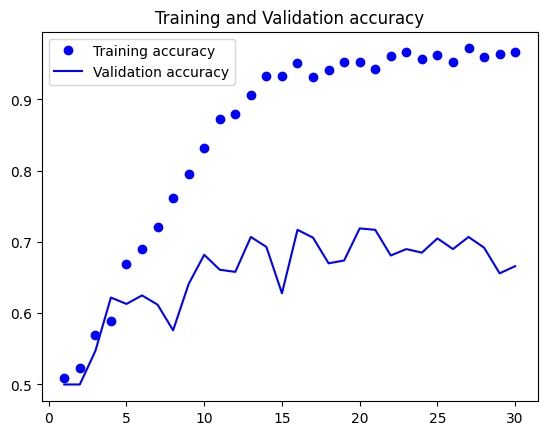

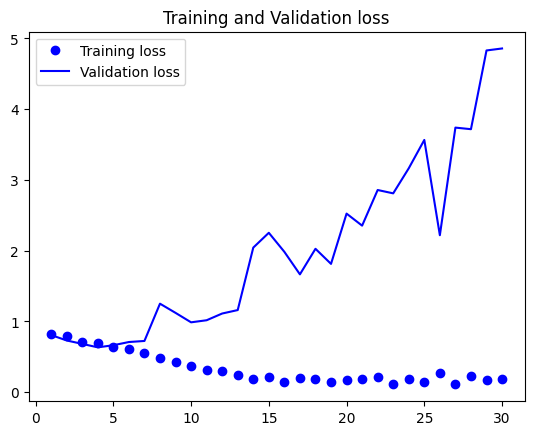

In [11]:
import matplotlib.pylab as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [16]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5602 - loss: 0.6974

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_41921]

In [17]:
import os
from PIL import Image

def verificar_imagens(diretorio):
    for root, _, arquivos in os.walk(diretorio):
        for nome_arquivo in arquivos:
            caminho = os.path.join(root, nome_arquivo)
            try:
                with Image.open(caminho) as img:
                    img.verify()
            except Exception as e:
                print(f"Imagem inválida: {caminho} → {e}")

verificar_imagens("cats-vs-dogs-small/test/cat/")
verificar_imagens("cats-vs-dogs-small/test/dog/")
